In [12]:
# Import libs
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from zipfile import ZipFile

In [13]:
# Load stored data
%store -r X_train
%store -r X_cv
%store -r y_train
%store -r y_cv
%store -r mmscaler
%store -r pca
%store -r X_train_pca
%store -r X_train_scaled

# Clustering
Clustering is an unsupervised machine learning method; class features are not given in the training examples. The aim is to construct a natural classification that can be used to predict features of the data. Examples are partitioned into $k$ clusters or classes.

## Hard clustering
Each sample is assigned to one cluster.

### K-means clustering
K-means clustering is a simple clustering algorithm used for hard clustering.

## 1. Use k-means clustering to find clusters in your data set. 
- evaluate the accracy of this clustering, visualize the clusters

In [14]:
from sklearn.cluster import KMeans

# cluster each image from X_train into 2 clusters 
kmeans_pca = KMeans(n_clusters=2, random_state=0).fit(X_train_pca)

In [15]:
X_train = pd.DataFrame(X_train)
X_train.shape

(18051, 12288)

#### Visualization

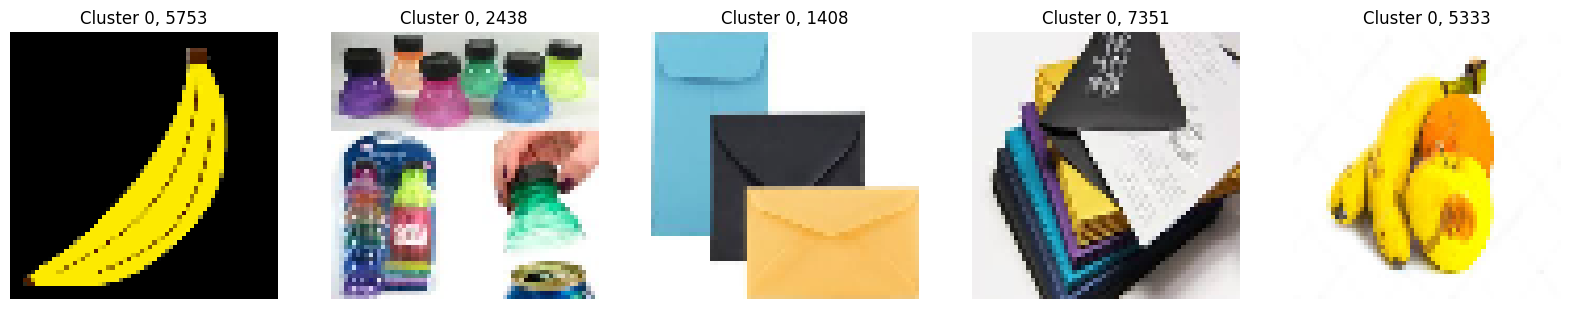

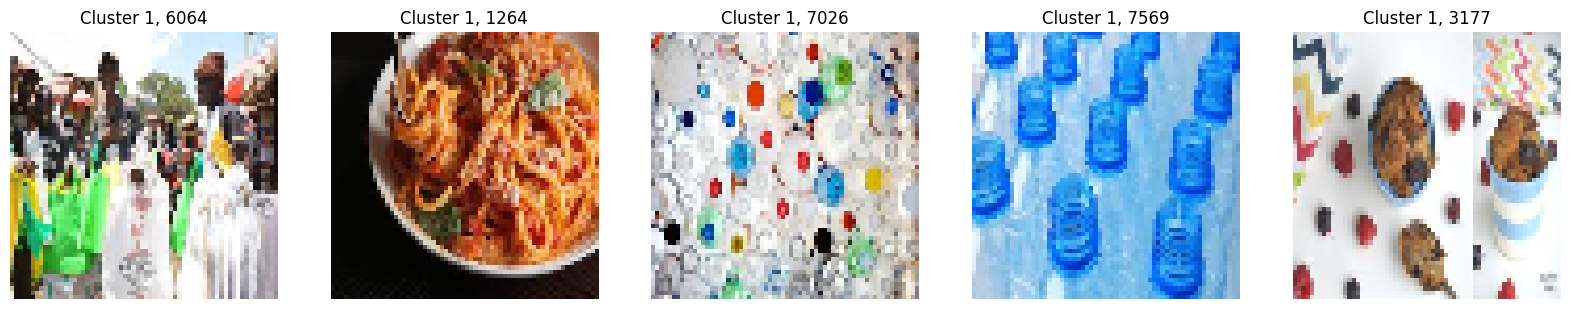

In [16]:
# take 5 random indexes from each cluster and plot original images
def plot_clusters(clusters):
    for c in range(clusters.n_clusters):
        cluster = X_train.iloc[clusters.labels_ == c]
        fig, axes = plt.subplots(1, 5, figsize=(20, 4))
        for i in range(5):
            random_choice = np.random.randint(0, cluster.shape[0])
            image = X_train.iloc[random_choice]
            axes[i].set_title("Cluster " + str(c) + ", " + str(image.name))
            axes[i].imshow(image.values.reshape(64, 64, 3))
            axes[i].axis('off')
    plt.show()

plot_clusters(kmeans_pca)

#### Decision Boundaries

In [19]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

#### dimensionality reduction to visualize clustering

In [20]:
## use PCA to reduce dimensionality down to 2D 
from sklearn.decomposition import PCA
X_2D = PCA(n_components=2).fit_transform(X_train)

In [21]:
kmeans_reduction = KMeans(n_clusters=2, random_state=0).fit(X_2D)

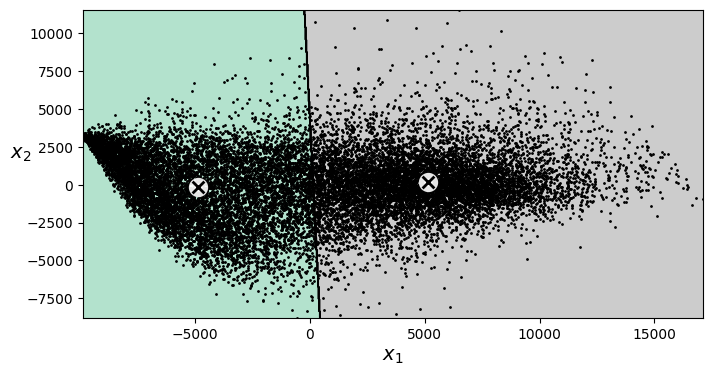

In [22]:
# plot decision boundary with reduced dataset
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_reduction, X_2D)
plt.show()

#### Evaluation

In [23]:
## Inertia
print("Sum of squared distances of samples to their closest cluster center: ", kmeans_pca.inertia_)

Sum of squared distances of samples to their closest cluster center:  13743403.83086137


In [24]:
X_dist = kmeans_pca.transform(X_train_pca)
print("Sum of squared distances of samples to their closest cluster center: ", sum((X_dist.min(axis=1))**2))

Sum of squared distances of samples to their closest cluster center:  13743403.830861317


In [25]:
print("Sum of squared distances of samples to their closest cluster center: ", -kmeans_pca.score(X_train_pca))

Sum of squared distances of samples to their closest cluster center:  13743403.83086137


In [26]:
## silhouette_score
from sklearn.metrics import silhouette_score
print("silhouette_score is: ", silhouette_score(X_train_pca, kmeans_pca.labels_))

silhouette_score is:  0.2833107470089308


## 2. Try different clustering algorithms for hard and soft clustering
- Such as EM, GMM, hierarchical clustering or any other algorithms of you choice
- Compare their performance on your data set

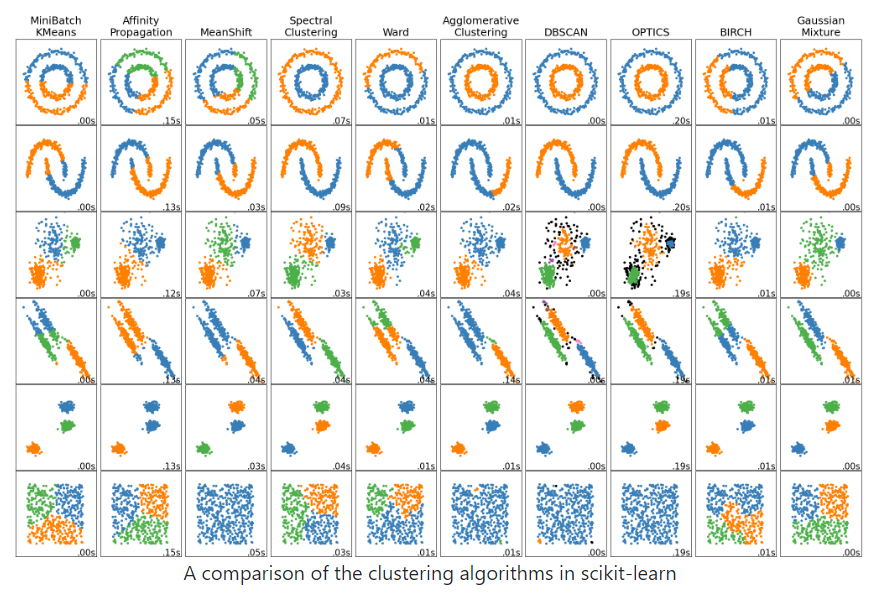

### BIRCH
https://scikit-learn.org/stable/modules/clustering.html#birch
Suitable for large dataset.

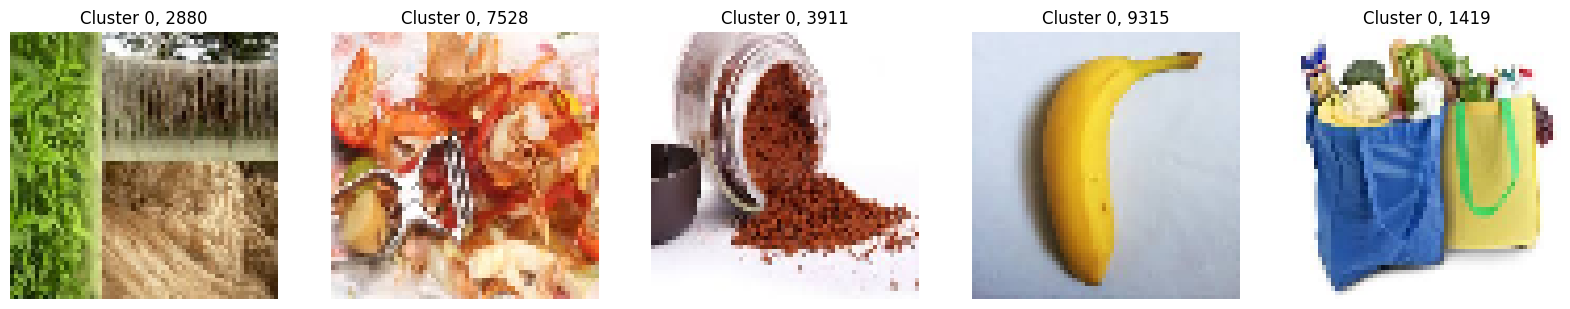

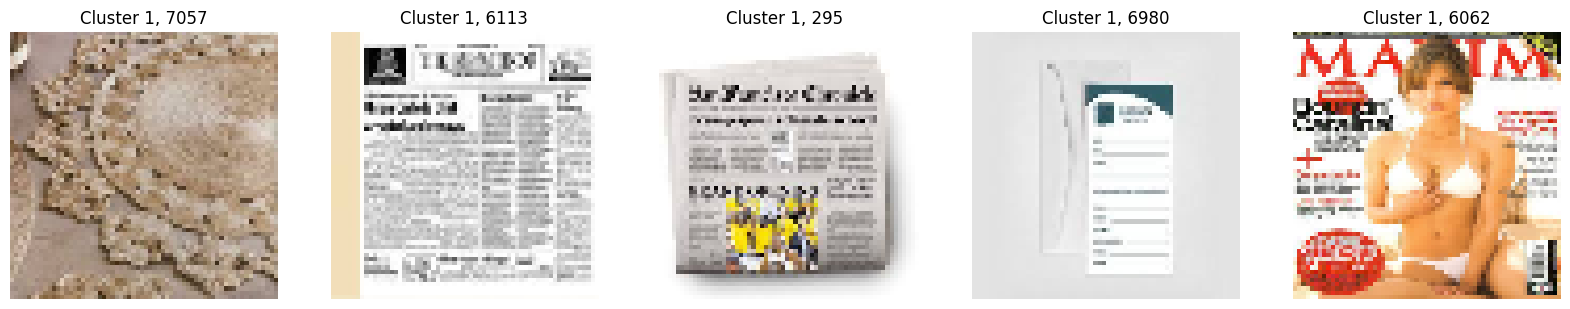

In [27]:
# BIRCH clustering
from sklearn.cluster import Birch

# cluster each image from X_train_pca
birch_pca = Birch(n_clusters=2).fit(X_train_pca)

# plot the clusters
plot_clusters(birch_pca)

### Hierarchical
https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering


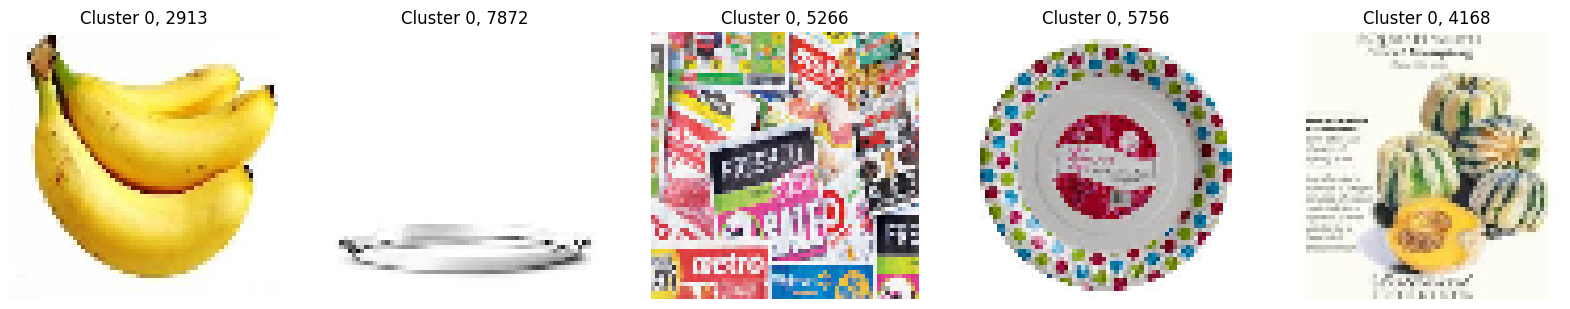

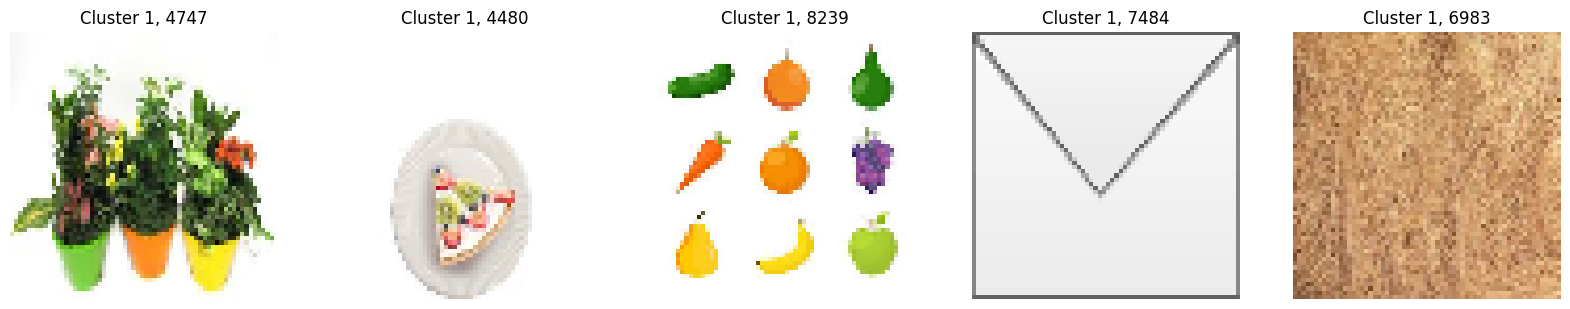

In [28]:
# ward clustering
from sklearn.cluster import AgglomerativeClustering

# cluster each image from X_train_pca
ward_pca = AgglomerativeClustering(n_clusters=2).fit(X_train_pca)

# plot the clusters
plot_clusters(ward_pca)

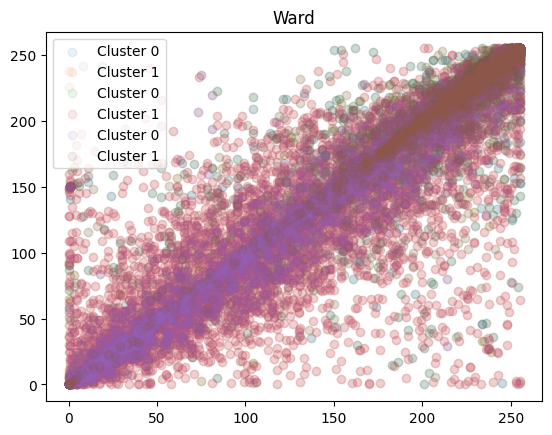

In [29]:
# plot scatter plots of each algorithm
def plot_scatter(clusters, title):
    plt.title(title)
    for c in range(clusters.n_clusters):
        cluster = X_train.iloc[clusters.labels_ == c]
        plt.scatter(cluster.iloc[:, 0], cluster.iloc[:, 1], label="Cluster " + str(c), alpha=0.1)
    plt.legend()
    #plt.show()

plot_scatter(kmeans_pca, "KMeans")
plot_scatter(birch_pca, "Birch")
plot_scatter(ward_pca, "Ward")

In [30]:
# evaluate accuracy of each algorithm
from sklearn.metrics import accuracy_score

print("KMeans accuracy: " + str(accuracy_score(y_train, kmeans_pca.labels_)))
print("Birch accuracy: " + str(accuracy_score(y_train, birch_pca.labels_)))
print("Ward accuracy: " + str(accuracy_score(y_train, ward_pca.labels_)))

KMeans accuracy: 0.3591490776134286
Birch accuracy: 0.3742728934685059
Ward accuracy: 0.6395213561575536


## Soft clustering
Each sample has a probability distribution for each cluster.

In [31]:
kmeans_pca.transform(X_train_pca)
birch_pca.transform(X_train_pca)

array([[51.23843555, 47.26763984, 43.42198689, ..., 72.04539441,
        68.89450497, 83.91456438],
       [51.27457289, 53.34155648, 52.99820705, ..., 47.6413169 ,
        43.76274916, 46.49577184],
       [43.94581627, 43.02234288, 39.00214461, ..., 54.65003533,
        49.8453397 , 61.50235939],
       ...,
       [43.23012405, 43.420001  , 41.79709386, ..., 72.67023294,
        67.89704533, 84.19139698],
       [42.21521453, 43.73952991, 43.18626365, ..., 41.14135784,
        43.2214805 , 50.45653191],
       [50.64131884, 50.04152337, 47.39688048, ..., 64.11550766,
        61.66405528, 72.84052124]])

In [32]:
from sklearn.mixture import GaussianMixture
gaussianMixture = GaussianMixture(random_state=0)
gaussianMixture.fit(X__pca)

NameError: name 'X_pca' is not defined

## 3. Find the optimal number of clusters
- Research some of the existing algorithms to compute the optimal number of clusters.
    - For example, Elbow method, the silhouette method, cluster validity and similarity measures
- Can these algorithms help you find the optimal number of clusters for your data set?
- How does it affect the accuracy of clustering?

### Elbow method

In [33]:
# train the dataset using Kmeans algorithm with clusters from 1 to 10
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_pca) for k in range(1, 10)]

In [34]:
# compute inertias for each Kmeans
inertias = [model.inertia_ for model in kmeans_per_k]

In [35]:
inertias

[20697733.592821717,
 13743403.83086137,
 12528055.929661581,
 11897002.249660667,
 11525870.947936445,
 11291168.949604686,
 11098078.385923294,
 10924150.31381059,
 10786703.050359296]

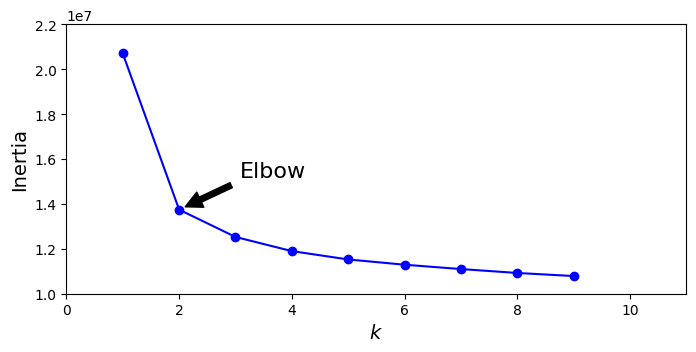

In [36]:
# plot the Inertia (to find Elbow)
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.3, 0.5),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([0, 11, 10000000, 22000000])
plt.show()

### Silhouette_score

In [37]:
# compute silhouette_score for each kmeans
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k[1:]]

In [38]:
silhouette_scores

[0.2833107470089308,
 0.17055715715649764,
 0.12271829632776461,
 0.11163788410442096,
 0.09548777001852407,
 0.08932106001292822,
 0.07335331880454016,
 0.07260452641295667]

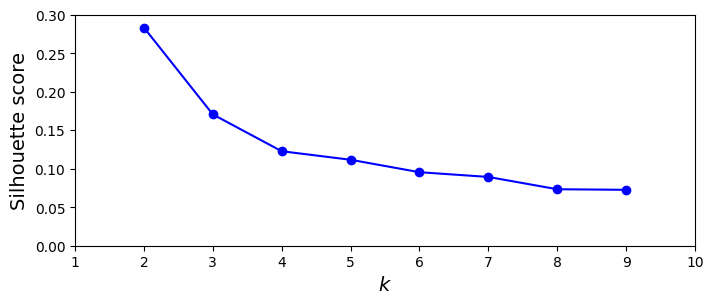

In [39]:
# plot silhouette_score
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 10, 0, 0.3])
plt.show()

### Homogeneity_score (Cluster validity)
A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
homogeneity_score(labels_true, labels_pred)

In [40]:
# compute homegeneity_score for each kmeans
from sklearn.metrics import homogeneity_score
homo_scores = [homogeneity_score(y_train, model.labels_) for model in kmeans_per_k]

In [41]:
homo_scores

[0.0,
 0.06060284263293705,
 0.07455794260032907,
 0.09737656630996457,
 0.10665463770357697,
 0.11483351175736899,
 0.13801678189641822,
 0.1441619900486174,
 0.1538222046223674]

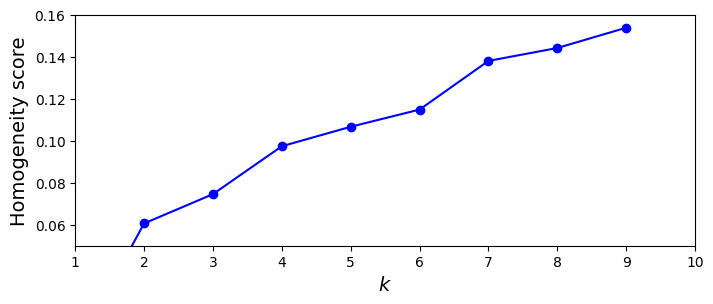

In [42]:
# plot homogeneity_score
plt.figure(figsize=(8, 3))
plt.plot(range(1, 10), homo_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Homogeneity score", fontsize=14)
plt.axis([1, 10, 0.05, 0.16])
plt.show()

### Accuracy

In [43]:
# compute accurary_score for each kmeans
from sklearn.metrics import accuracy_score
accuracy_scores = [accuracy_score(y_train, model.labels_) for model in kmeans_per_k]
accuracy_scores

[0.5546507118719185,
 0.3591490776134286,
 0.27438923051354497,
 0.27056672760511885,
 0.17672151127361366,
 0.11090798293723339,
 0.08703118940778905,
 0.12531161708492605,
 0.051243698410060386]

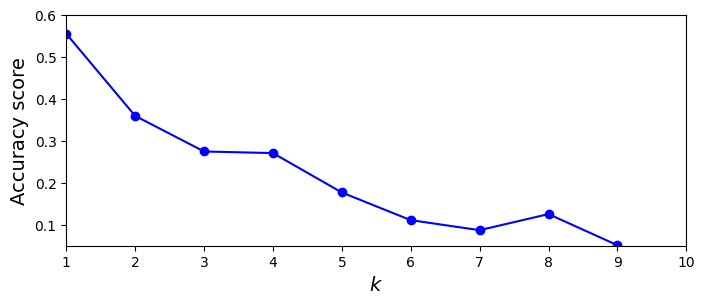

In [44]:
# plot accuracy_score
plt.figure(figsize=(8, 3))
plt.plot(range(1, 10), accuracy_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Accuracy score", fontsize=14)
plt.axis([1, 10, 0.05, 0.60])
plt.show()

## 4. Compare between clustering algorithms and different number of clusters using a suitable form

In [45]:
# make data from for evaluation metrics
columns = ['Inertia', 'Silhouette score', 'Homogeneity_score', 'Accuracy']
eval_metrics_clustering = pd.DataFrame(columns = columns)
eval_metrics_clustering

,Inertia,Silhouette score,Homogeneity_score,Accuracy


In [46]:
for i, model in enumerate(kmeans_per_k):
    index = str(model)
    if (i == 1):
        eval_metrics_clustering.loc[index]= [inertias[i], 0, homo_scores[i], accuracy_scores[i]]
    else:
        eval_metrics_clustering.loc[index]= [inertias[i], silhouette_scores[i-1], homo_scores[i], accuracy_scores[i]]
eval_metrics_clustering

,Inertia,Silhouette score,Homogeneity_score,Accuracy
"KMeans(n_clusters=1, random_state=42)",2.069773e+07,0.072605,0.000000,0.554651
"KMeans(n_clusters=2, random_state=42)",1.374340e+07,0.000000,0.060603,0.359149
"KMeans(n_clusters=3, random_state=42)",1.252806e+07,0.170557,0.074558,0.274389
"KMeans(n_clusters=4, random_state=42)",1.189700e+07,0.122718,0.097377,0.270567
"KMeans(n_clusters=5, random_state=42)",1.152587e+07,0.111638,0.106655,0.176722
"KMeans(n_clusters=6, random_state=42)",1.129117e+07,0.095488,0.114834,0.110908
"KMeans(n_clusters=7, random_state=42)",1.109808e+07,0.089321,0.138017,0.087031
KMeans(random_state=42),1.092415e+07,0.073353,0.144162,0.125312
"KMeans(n_clusters=9, random_state=42)",1.078670e+07,0.072605,0.153822,0.051244
